# Assignment 2: Supervised Machine Learning (Classification)






In [1]:

%load_ext autoreload
%autoreload 2

In [2]:
from config_reader import ConfigReader
from dataset import Dataset
from data_predictor import DataPredictor
from evaluation_metrics import EvaluationMetrics

The three sklearn classifiers [_SVM_](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) (Support Vector Classification), [_Logistic Regression Classifier_](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), and [_Dummy Classifier_](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) are imported to the notebook and instantiated. You should try additional classifiers from [sklearn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) yourself.   
**Don't forget** to import and add your own implementation of kNN!

In [3]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
support_vector_clf = svm.SVC(kernel="linear") 
logistic_regression_clf = LogisticRegression(random_state=0, max_iter=10000)

## Heart Disease Dataset

Let's try the classifiers on the Heart Disease Dataset, by passing the created classifier objects to ``DataPredictor``'s ``best_classifier`` method (add your additional classifier objects to the list here). For comparison and visualization, the methods ``print_evaluation_results`` and ``visualize_classification_results`` are called.

In [4]:
config_dict = ConfigReader.read_json_config("./config_heart_disease.json")
dataset = Dataset(config_dict)
predictor = DataPredictor(dataset, config_dict)

In [16]:
import numpy as np
dataset.split_data(impute_strategy='mean')
e = EvaluationMetrics(np.array([0, 1, 1, 0, 2, 2, 2, 2, 2]), np.array([0, 1, 0, 0, 2, 2, 2, 0, 0]))
print(e)
print(e.confusion_matrix)


Evaluation Summary:
    Accuracy: 0.6666666666666666
    Precision:
        Class 0: 0                    Class 1: 0			
    Recall:
        Class 0: 0                    Class 1: 0			
    F1 Score:
        Class 0: 0                    Class 1: 0				
    True Positives:
        Class 0: 2                    Class 1: 1                    Class 2: 3				
    True Negatives:
        Class 0: 0                    Class 1: 0				
    False Positives:
        Class 0: 0                    Class 1: 0		
    False Negatives:
        Class 0: 0                    Class 1: 0	

[[2 0 0]
 [1 1 0]
 [2 0 3]]



Evaluation Summary:
    Accuracy: 0.6390977443609023
    Precision:
        Class 0: 0                    Class 1: 0			
    Recall:
        Class 0: 0                    Class 1: 0			
    F1 Score:
        Class 0: 0                    Class 1: 0				
    True Positives:
        Class 0: 94                   Class 1: 161				
    True Negatives:
        Class 0: 0                    Class 1: 0				
    False Positives:
        Class 0: 0                    Class 1: 0		
    False Negatives:
        Class 0: 0                    Class 1: 0	

[[ 94  84]
 [ 60 161]]


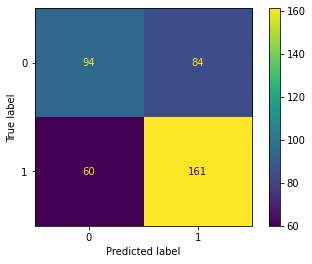

In [17]:
best_classifier = predictor.best_classifier([dummy_clf, support_vector_clf, logistic_regression_clf])
predictor.print_evaluation_results()
predictor.visualize_classification_results()

## Parkinson Speech Dataset

Now with the Parkinson Speech Dataset, again the created classifier objects are passed to ``DataPredictor``'s ``best_classifier`` method (add your additional classifier objects to the list here). For comparison and visualization, the methods ``print_evaluation_results`` and ``visualize_classification_results`` are called.

In [7]:
config_dict = ConfigReader.read_json_config("./config_parkinson_sound_recording.json")
dataset = Dataset(config_dict)
predictor = DataPredictor(dataset, config_dict)

In [8]:
best_classifier = predictor.best_classifier([dummy_clf, support_vector_clf, logistic_regression_clf])
predictor.print_evaluation_results()
predictor.visualize_classification_results()


Evaluation Summary:
    Accuracy: 0.6390977443609023
    Precision:
        Class 0: 0                    Class 1: 0			
    Recall:
        Class 0: 0                    Class 1: 0			
    F1 Score:
        Class 0: 0                    Class 1: 0				
    True Positives:
        Class 0: 94                   Class 1: 161				
    True Negatives:
        Class 0: 0                    Class 1: 0				
    False Positives:
        Class 0: 0                    Class 1: 0		
    False Negatives:
        Class 0: 0                    Class 1: 0	

